## PROBLEM STATEMENT ##

### Objective: ###
To categorise the countries using socio-economic and health factors that determine the overall development of the country.
About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

## About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement: ###
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Data Description

**Column Name**	    **Description**

**country** :	Name of the country

**child_mort** :	Death of children under 5 years of age per 1000 live births

**exports** :	Exports of goods and services per capita. Given as %age of the GDP per capita

**health** :	Total health spending per capita. Given as %age of GDP per capita

**imports** :	Imports of goods and services per capita. Given as %age of the GDP per capita

**Income** :	Net income per person

**Inflation** :	The measurement of the annual growth rate of the Total GDP

**life_expec** :	The average number of years a new born child would live if the current mortality patterns are to remain the same

**total_fer** :	The number of children that would be born to each woman if the current age-fertility rates remain the same.

**gdpp** :	The GDP per capita. Calculated as the Total GDP divided by the total population.

In [28]:
# import required libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_csv('Country-data.csv')

In [30]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [31]:
#lets use contry name as indexda
data.set_index('country', inplace=True)

In [32]:
data.shape

(167, 9)

## Data Exploration ##

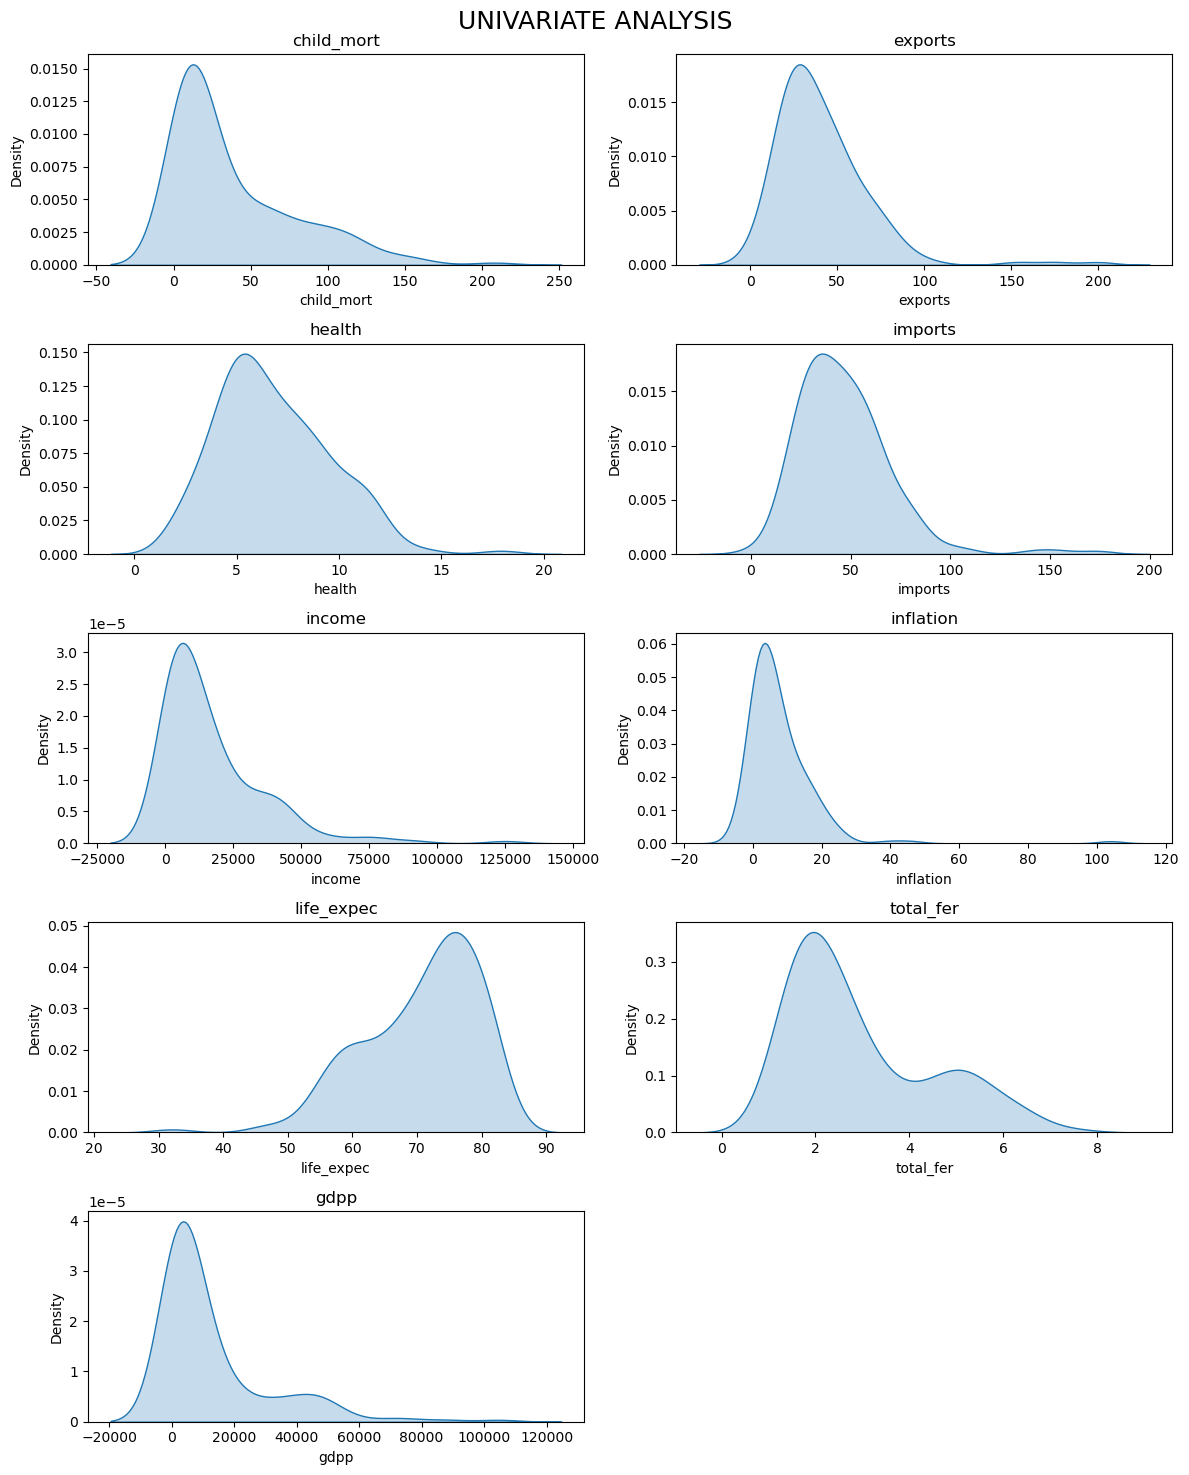

In [34]:
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('UNIVARIATE ANALYSIS',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.kdeplot(data=data,x=i,fill = True)
    plt.title(i)
    t +=1

plt.tight_layout()
plt.show()

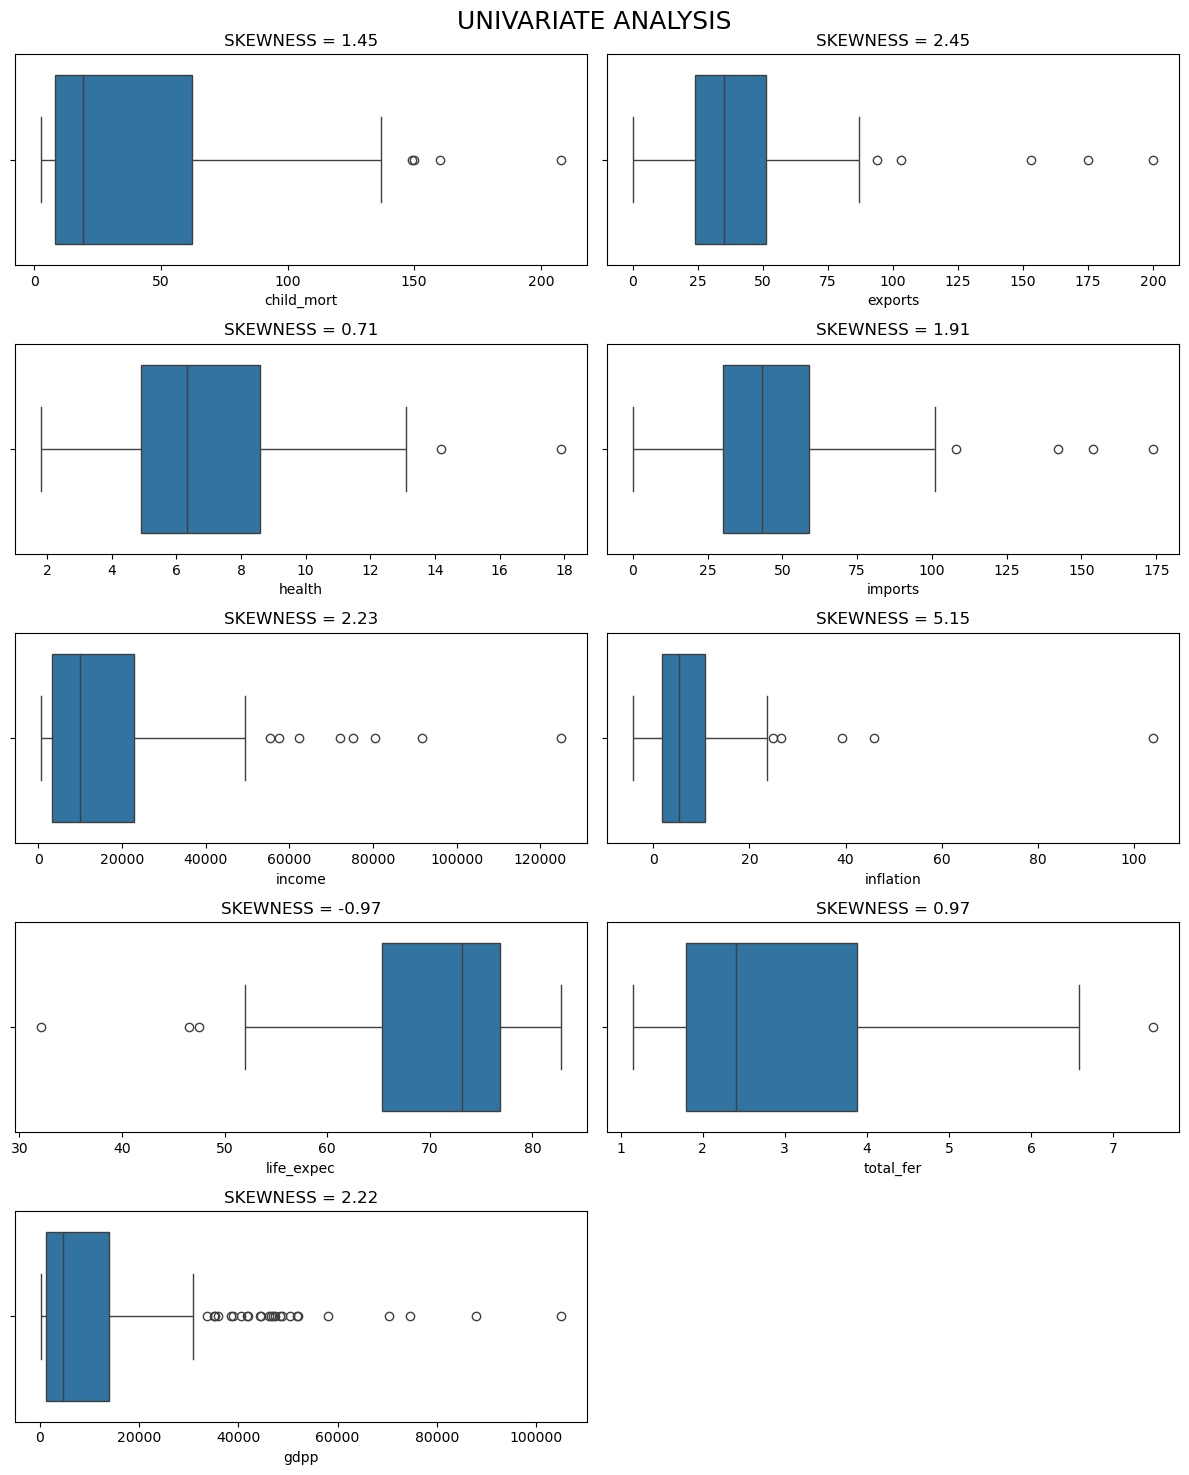

In [35]:
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('UNIVARIATE ANALYSIS',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i,fill = True)
    plt.title(f'SKEWNESS = {round(data[i].skew(),2)}')
    t +=1

plt.tight_layout()
plt.show()

## Multivariate Analysis ##

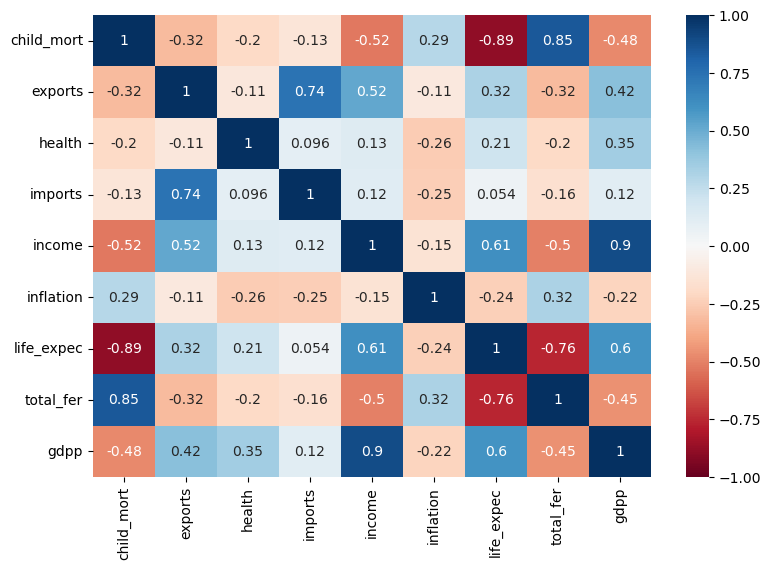

In [37]:
plt.figure(figsize = (9,6))
sns.heatmap(data.corr(),vmin=-1,annot = True,cmap = 'RdBu')
plt.show()

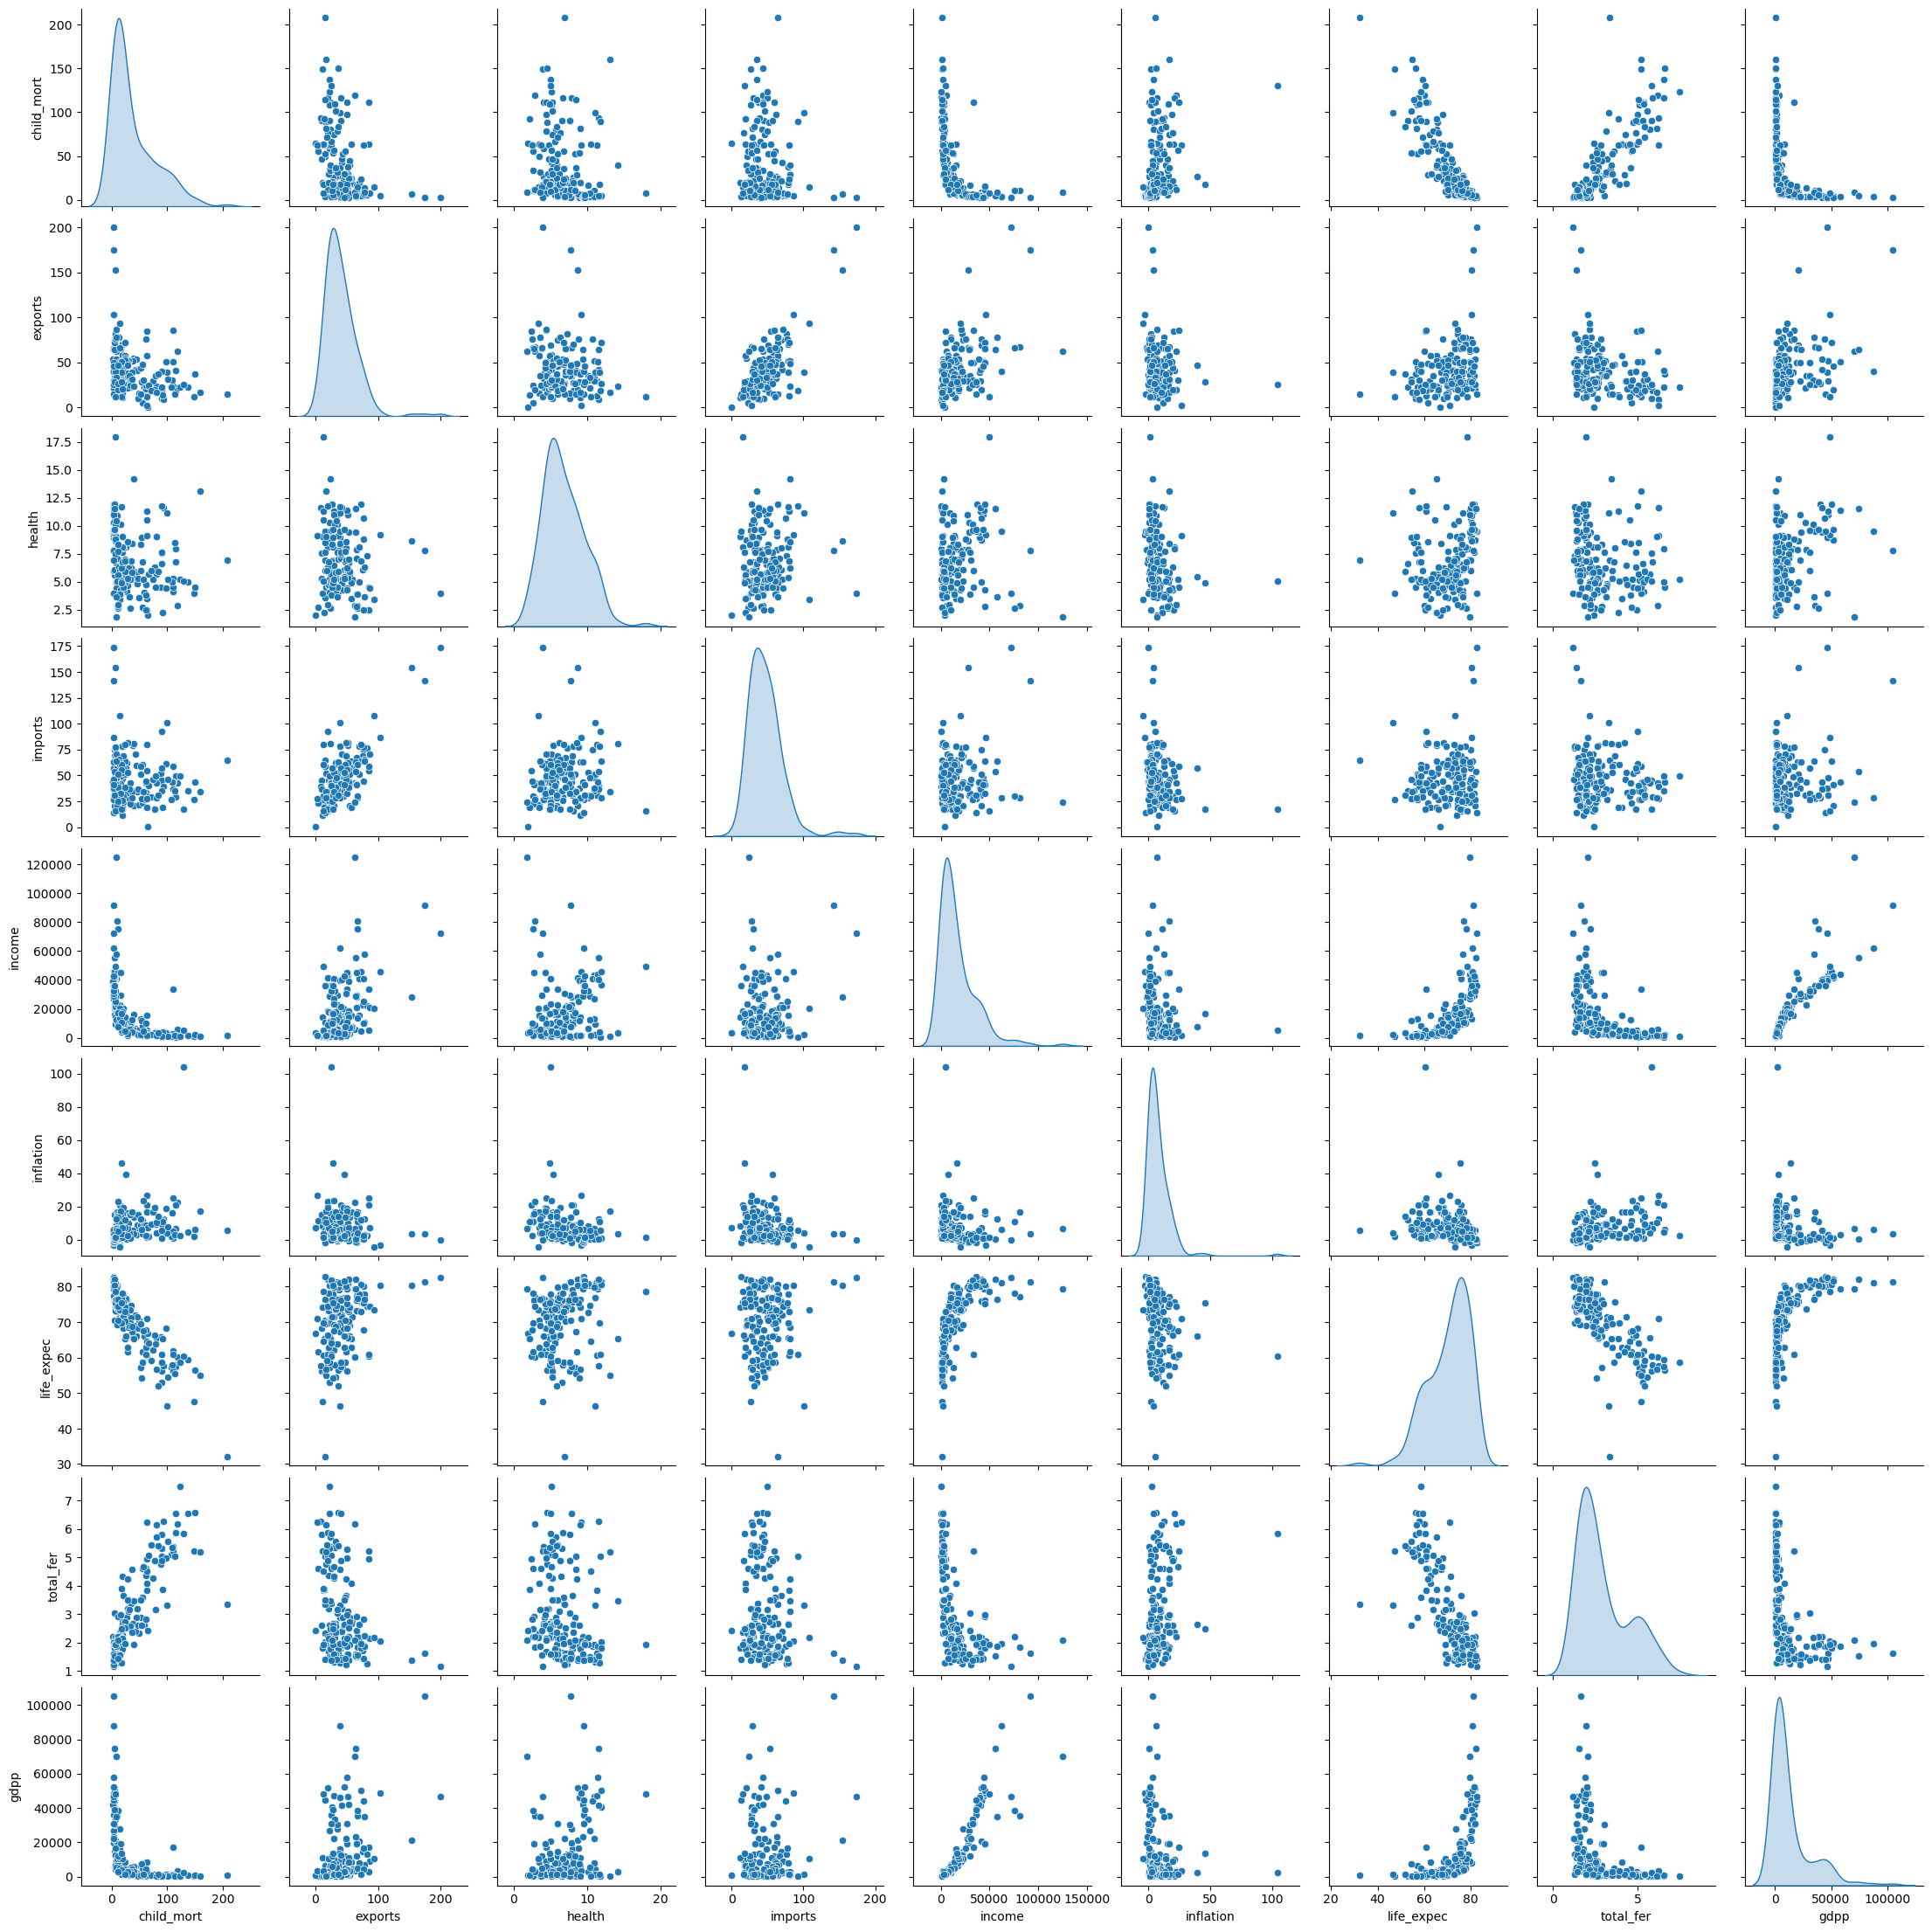

In [38]:
## pair plot
sns.pairplot(data,diag_kind = 'kde')
plt.show()

## DATA PREPROCESSING ## 

In [40]:
#Missing values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

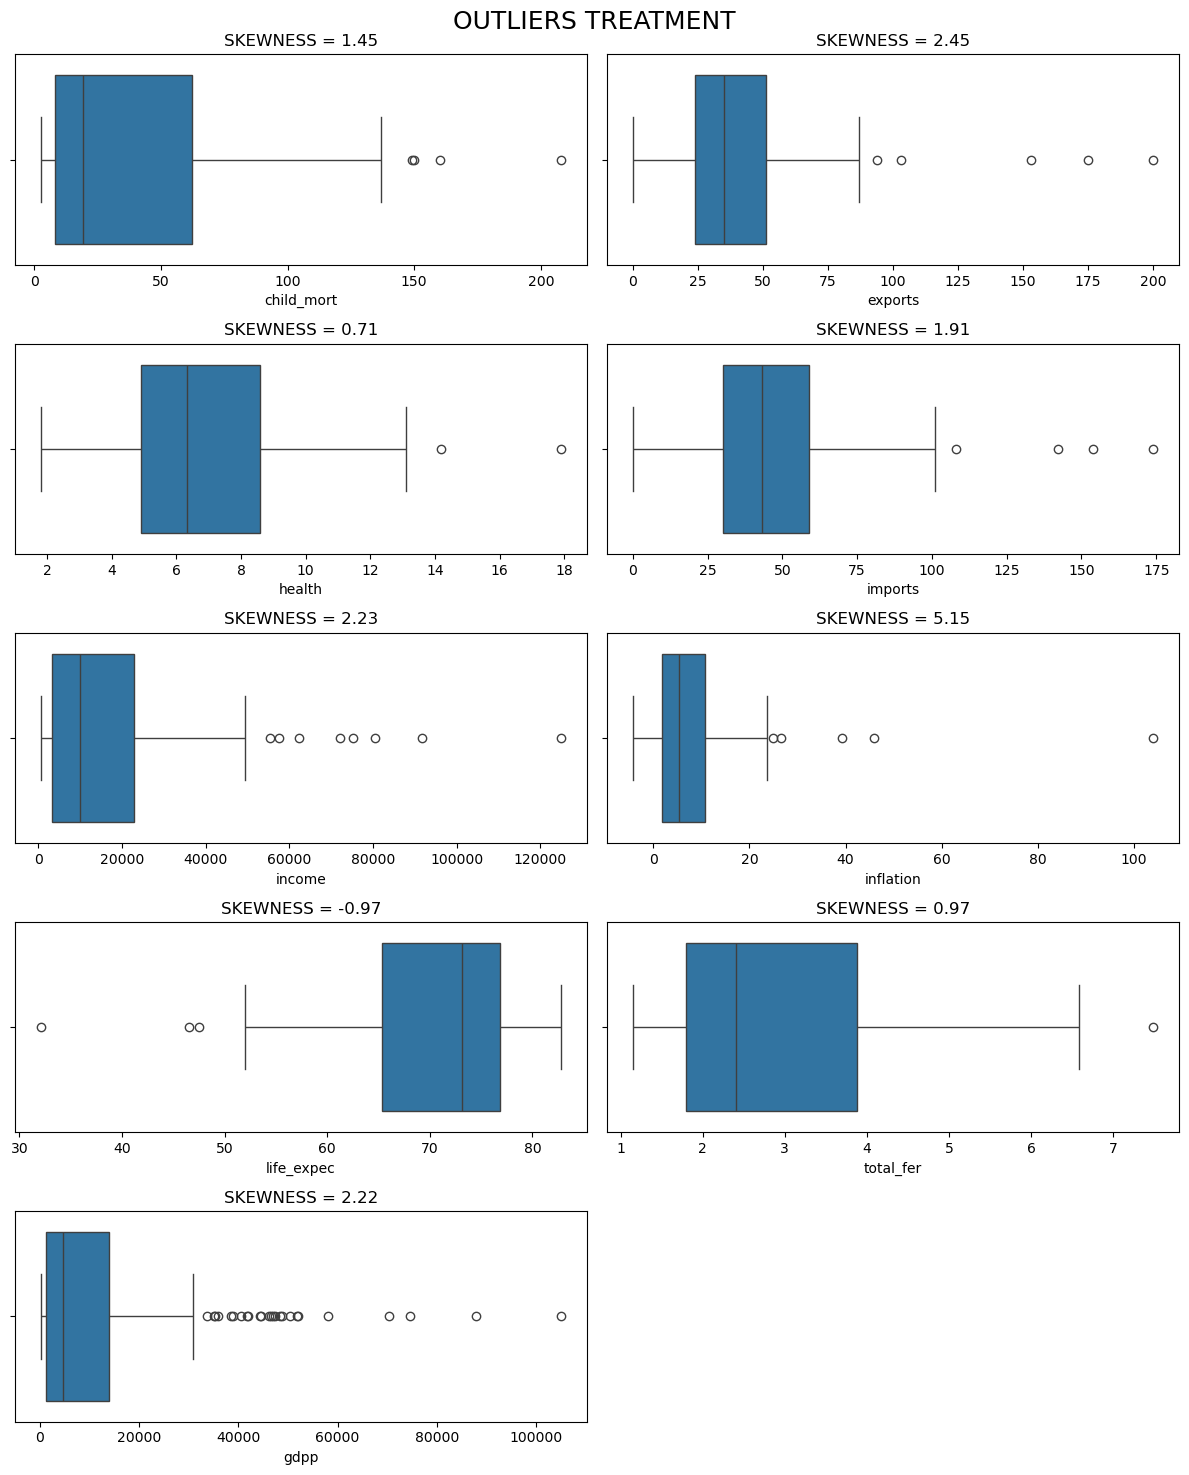

In [41]:
#lets check outliers
#we do have some outliers
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('OUTLIERS TREATMENT',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i,fill = True)
    plt.title(f'SKEWNESS = {round(data[i].skew(),2)}')
    t +=1

plt.tight_layout()
plt.show()

In [42]:
import numpy as np

In [43]:
# lets go with capping to treat the outliers (cap the extreme outliers 2)
for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

In [44]:
#after removing outliers

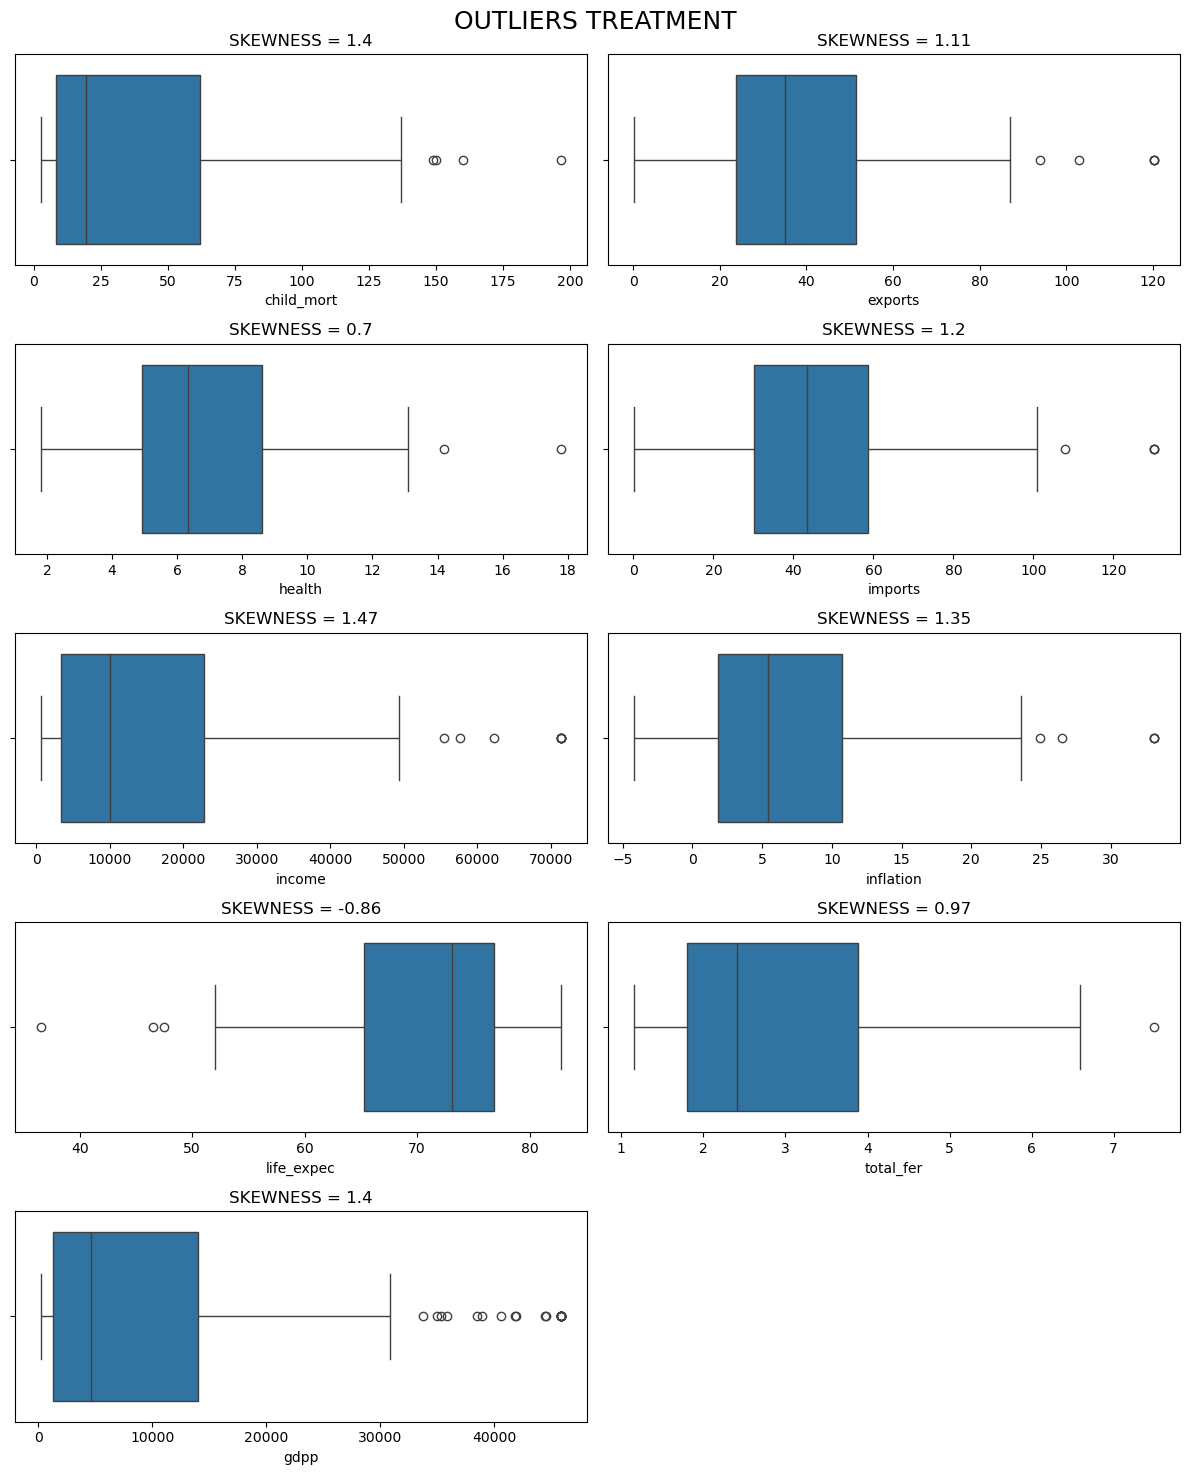

In [45]:
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('OUTLIERS TREATMENT',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i,fill = True)
    plt.title(f'SKEWNESS = {round(data[i].skew(),2)}')
    t +=1

plt.tight_layout()
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
data_s = data.copy()

In [49]:
data_s = pd.DataFrame(scaler.fit_transform(data_s),columns = data.columns,index = data.index)

In [50]:
data_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.302168,-1.314143,0.279553,-0.068565,-0.878427,0.303790,-1.642400,1.902882,-0.767399
Albania,-0.540991,-0.528460,-0.096883,0.099062,-0.391534,-0.381016,0.652932,-0.859973,-0.526335
Algeria,-0.273031,-0.074510,-0.966706,-0.680176,-0.217727,1.225166,0.675771,-0.038404,-0.501118
Angola,2.023403,0.968702,-1.449130,-0.159174,-0.627373,2.096738,-1.197037,2.128151,-0.564502
Antigua and Barbuda,-0.698761,0.235398,-0.286928,0.565699,0.145102,-0.802968,0.710030,-0.541946,0.026399


## Clustering ##

In [52]:
# step 1: identify the value of k
#Kelbow method

In [53]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [54]:

from sklearn.cluster import KMeans

In [55]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

## Method 1 - Kelbow method

In [57]:
wcss = []
n_clus = range(2,11)
for i in n_clus:
    mod = KMeans(n_clusters = i)
    mod.fit(data_s)
    wcss.append(mod.inertia_)

In [58]:
wcss

[1018.5342980318554,
 790.2705328063224,
 696.7852455833956,
 638.9058369973226,
 586.0631049809775,
 530.1715516260763,
 478.47471125788655,
 425.8126461630764,
 422.13735506929964]

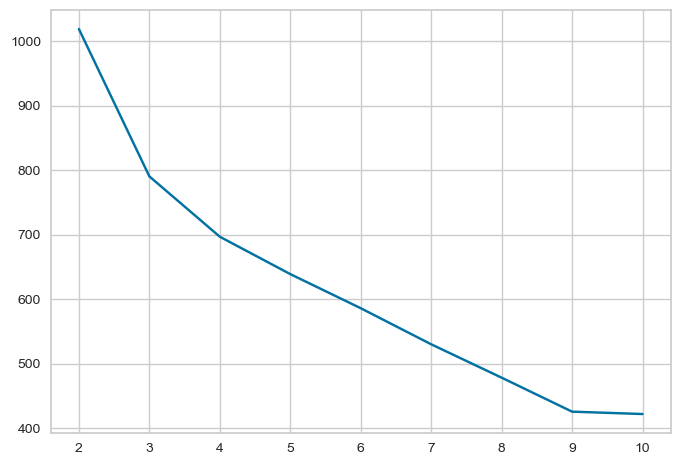

In [153]:
plt.plot(n_clus,wcss)
plt.show()

In [155]:
# yellow brick library to make klbow plot
keblow = KElbowVisualizer(estimator = KMeans(),k=10)

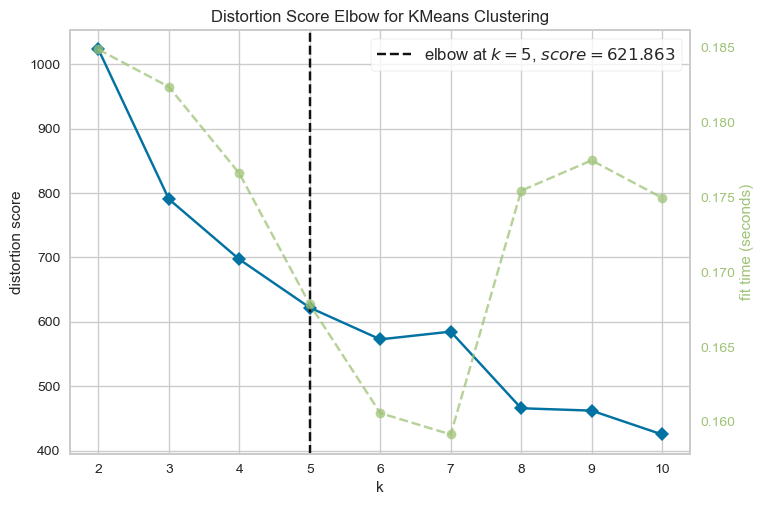

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [157]:
keblow.fit(data_s)
keblow.show()

## Method 2 - Silhoutte visualizer ##

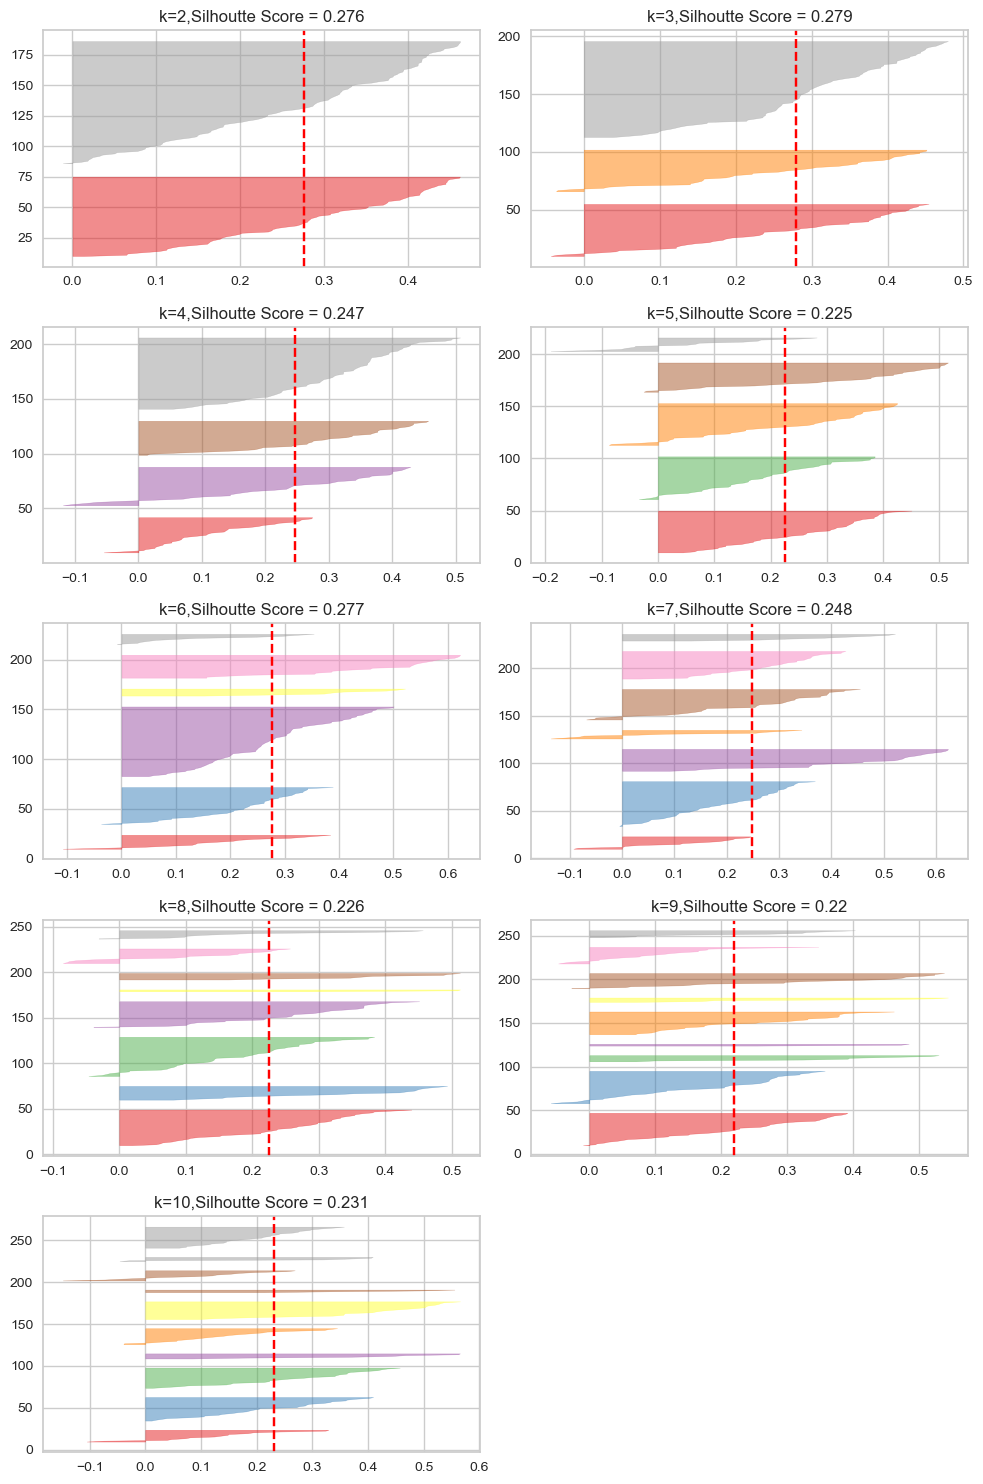

In [63]:
t = 1
plt.figure(figsize = (10,15))
for i in n_clus:
    plt.subplot(5,2,t)
    model = KMeans(n_clusters = i)
    sil_viz = SilhouetteVisualizer(estimator = model)
    sil_viz.fit(data_s)
    plt.title(f'k={i},Silhoutte Score = {round(sil_viz.silhouette_score_,3)}')
    t += 1
plt.tight_layout()
plt.show()

In [64]:
# we will go with k = 3

In [65]:
# Fit a final model with K=3
final_Kmeans = KMeans(n_clusters = 3)

In [66]:
labels_Kmean = final_Kmeans.fit_predict(data_s)

In [67]:
labels_Kmean

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

## Visualize these clusters ##

In [69]:
data['Label'] = labels_Kmean

In [70]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


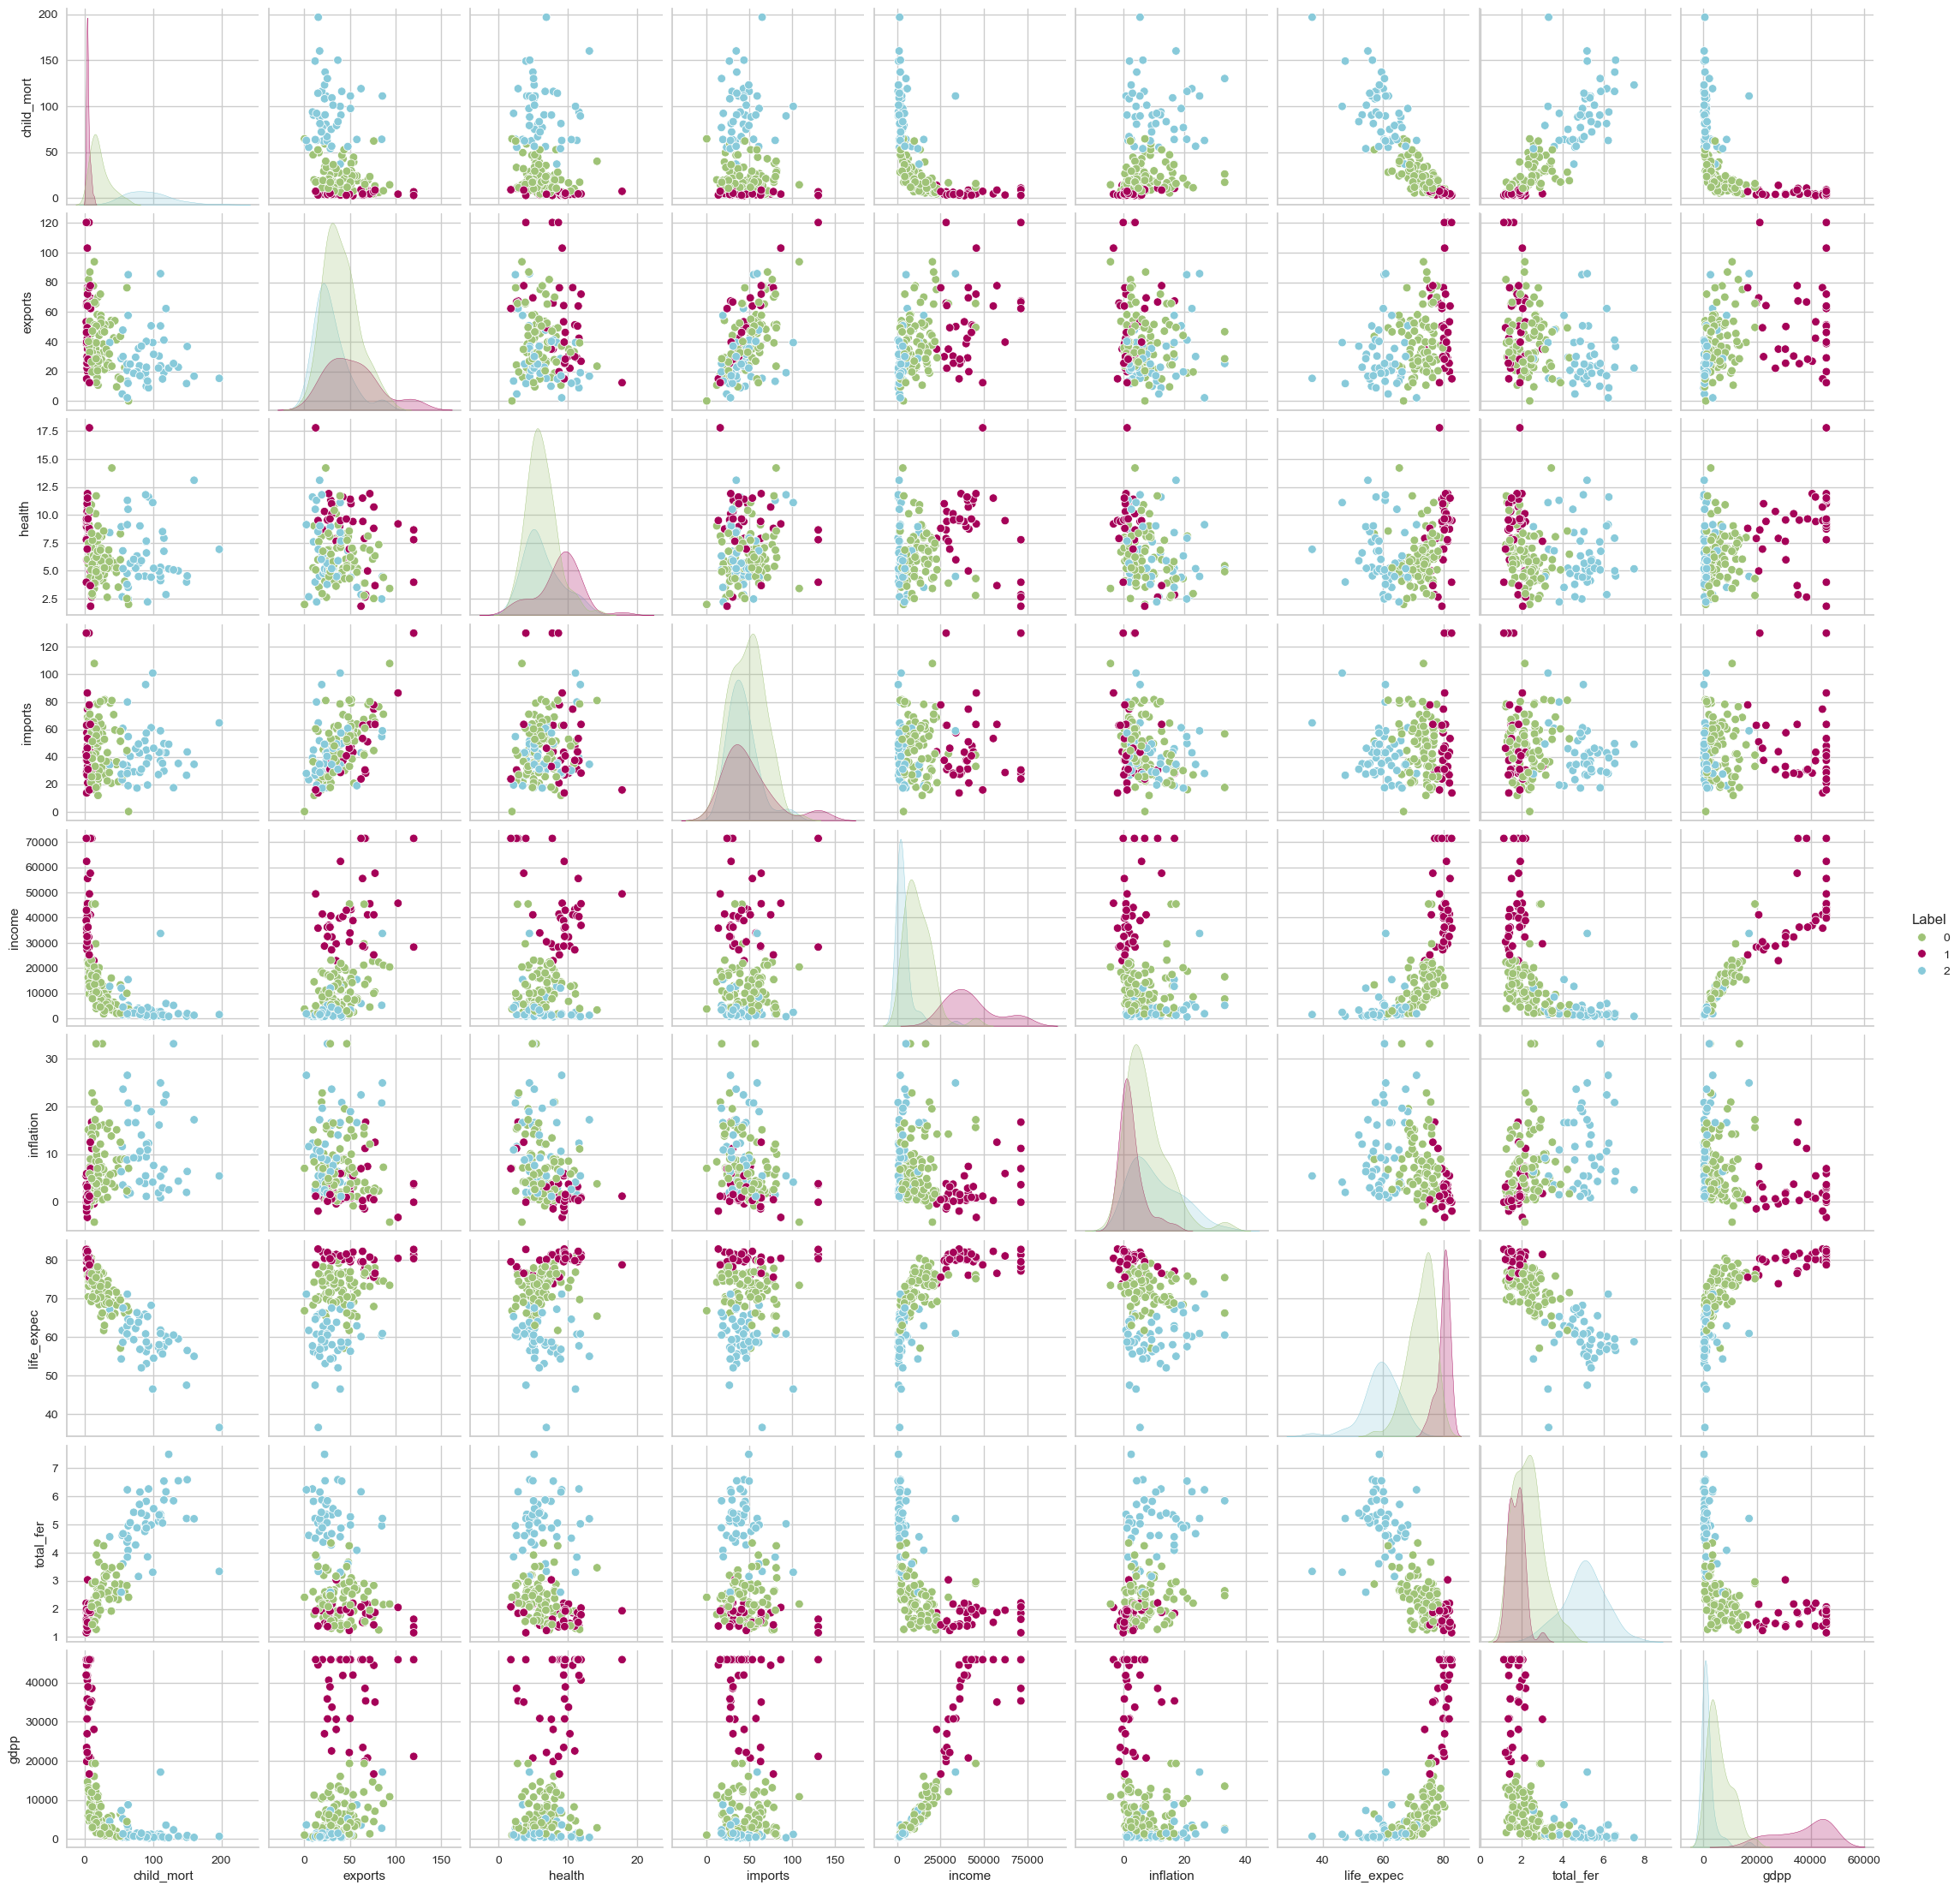

In [71]:
sns.pairplot(data, hue='Label',diag_kind = 'kde',palette = ['g','m','c'])

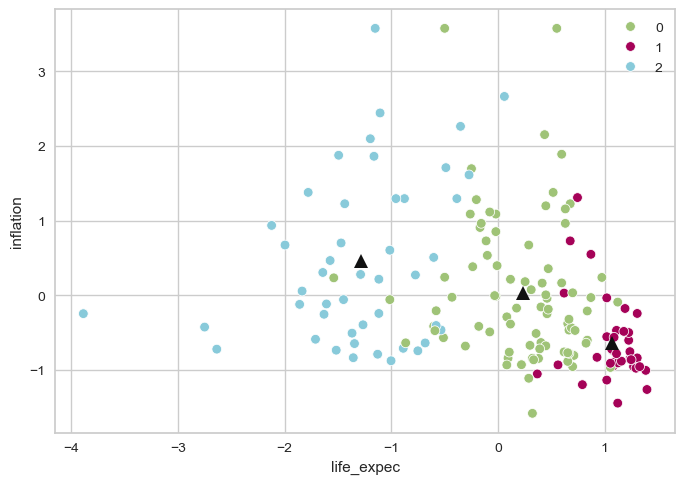

In [72]:
#Life Expectancy vs inflation
sns.scatterplot(data = data_s,x = 'life_expec',y='inflation',hue=labels_Kmean,palette = ['g','m','c'])
centroids = final_Kmeans.cluster_centers_
for i in range(3):
    plt.plot(centroids[i][6],centroids[i][5],marker='^',color = 'k',ms = 10)
plt.show() 

In [73]:
#lets Visualize the centroid also 
final_Kmeans.cluster_centers_

array([[-0.39603983,  0.0104438 , -0.22266622,  0.05212111, -0.25920044,
         0.03357158,  0.23217578, -0.41629747, -0.38057204],
       [-0.82553217,  0.58786397,  0.71821855,  0.12303061,  1.52565853,
        -0.64408834,  1.07051786, -0.78995685,  1.71018854],
       [ 1.38721818, -0.4919184 , -0.17108964, -0.19413709, -0.75383758,
         0.45676644, -1.28504188,  1.39559546, -0.6806288 ]])

In [74]:
data_s.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Aggloromative Clustering

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram,linkage ,cophenet

In [77]:
#cophentic correlation coeficient

In [78]:
#Actual Distance and linkage distance 

In [79]:
data_s.shape

(167, 9)

In [159]:
#step1 -create a distance matrix
dist_mat = euclidean_distances(data_s)
dist_mat.shape

(167, 167)

In [81]:
dist_mat

array([[0.        , 4.22497166, 4.05512607, ..., 4.81943201, 2.93131062,
        1.70971699],
       [4.22497166, 0.        , 2.21987426, ..., 2.68256614, 3.71500907,
        4.40647111],
       [4.05512607, 2.21987426, 0.        , ..., 3.0222937 , 2.15156181,
        3.65903186],
       ...,
       [4.81943201, 2.68256614, 3.0222937 , ..., 0.        , 3.86071845,
        4.55968616],
       [2.93131062, 3.71500907, 2.15156181, ..., 3.86071845, 0.        ,
        2.4025262 ],
       [1.70971699, 4.40647111, 3.65903186, ..., 4.55968616, 2.4025262 ,
        0.        ]])

In [82]:
#step 2: using distance matrix lets create linkage matrix
link_matrix = linkage(dist_mat,method = 'ward')

In [83]:
link_matrix

array([[ 41.        , 121.        ,   1.44272406,   2.        ],
       [  8.        ,  44.        ,   1.79789272,   2.        ],
       [ 75.        , 158.        ,   1.89770657,   2.        ],
       [ 34.        , 119.        ,   2.27401464,   2.        ],
       [  4.        ,  24.        ,   2.47323943,   2.        ],
       [ 17.        ,  28.        ,   2.49857212,   2.        ],
       [ 48.        ,  61.        ,   2.49969821,   2.        ],
       [ 53.        , 144.        ,   2.5835313 ,   2.        ],
       [ 29.        ,  54.        ,   2.58883697,   2.        ],
       [ 50.        , 116.        ,   2.69116158,   2.        ],
       [ 80.        , 129.        ,   2.7425147 ,   2.        ],
       [ 71.        , 125.        ,   2.75089707,   2.        ],
       [ 23.        ,  82.        ,   2.75499399,   2.        ],
       [ 60.        , 122.        ,   2.80044691,   2.        ],
       [ 13.        , 167.        ,   2.83607045,   3.        ],
       [100.        , 171

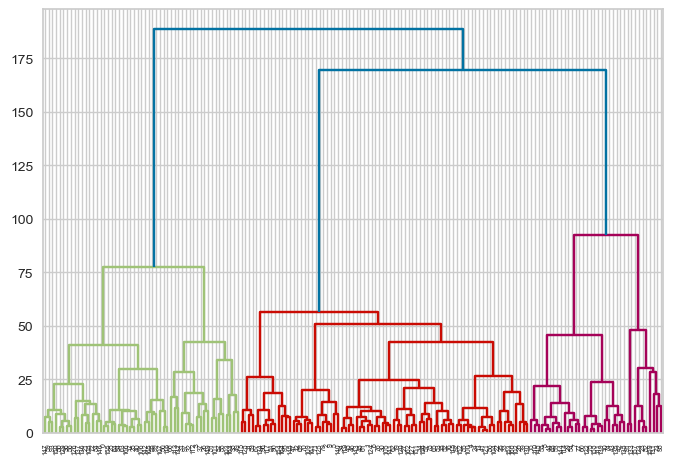

In [84]:
#step 3: create a dendrogram
dendrogram(link_matrix)
plt.show()

In [85]:
#calculate cophenetic correlation coeficient 
actual_dist = dist_mat[np.triu_indices(167,k=1)]
actual_dist  

array([4.22497166, 4.05512607, 3.50657505, ..., 3.86071845, 4.55968616,
       2.4025262 ])

In [86]:
cophenet(link_matrix,actual_dist)

(0.5938368934086127,
 array([188.49913764, 188.49913764,  77.22355444, ..., 188.49913764,
        188.49913764,  29.81494541]))

In [87]:
#hence we can go with wards linkage with k = 3

In [88]:
final_agglo = AgglomerativeClustering(n_clusters = 3)

In [89]:
labels_agglo = final_agglo.fit_predict(data_s)

In [90]:
silhouette_score(data_s,labels_agglo)

0.26372599816303177

<Axes: xlabel='life_expec', ylabel='inflation'>

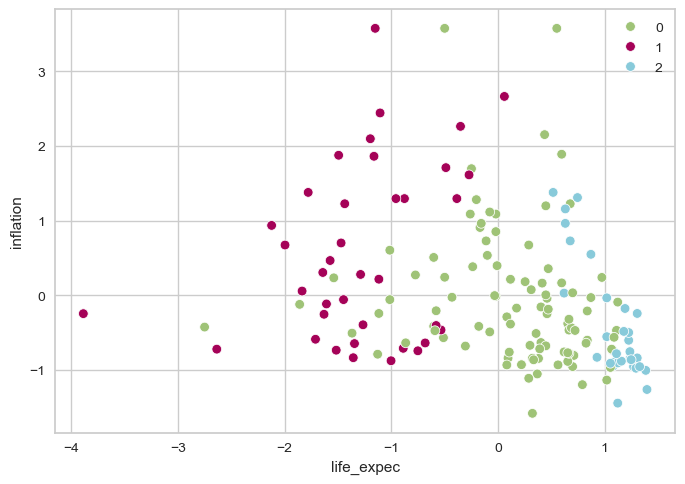

In [91]:
 sns.scatterplot(data = data_s,x = 'life_expec',y='inflation',hue=labels_agglo,palette = ['g','m','c'])

## Business interpretation

In [170]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [168]:
data.groupby(by='Label').mean().T

Label,0,1,2
child_mort,22.388095,5.237838,93.596196
exports,40.346298,53.575000,28.837174
health,6.205833,8.780270,6.346957
imports,47.563880,49.129054,42.128261
income,12191.309524,42690.878378,3738.978261
inflation,7.486774,2.588432,10.545761
life_expec,72.615476,79.956757,59.329348
total_fer,2.319643,1.755676,5.054348
gdpp,6228.714286,36905.405405,1826.130435


In [172]:
label_map = {0:'Developing',1:'Developed',2:'Underdeveloped'}

In [174]:
data['Label'] = data['Label'].map(label_map)

In [176]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing


In [178]:
#Underdeveloped 
data[data['Label'] == 'Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
       'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

In [180]:
#developed
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [182]:
#developing
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Sur

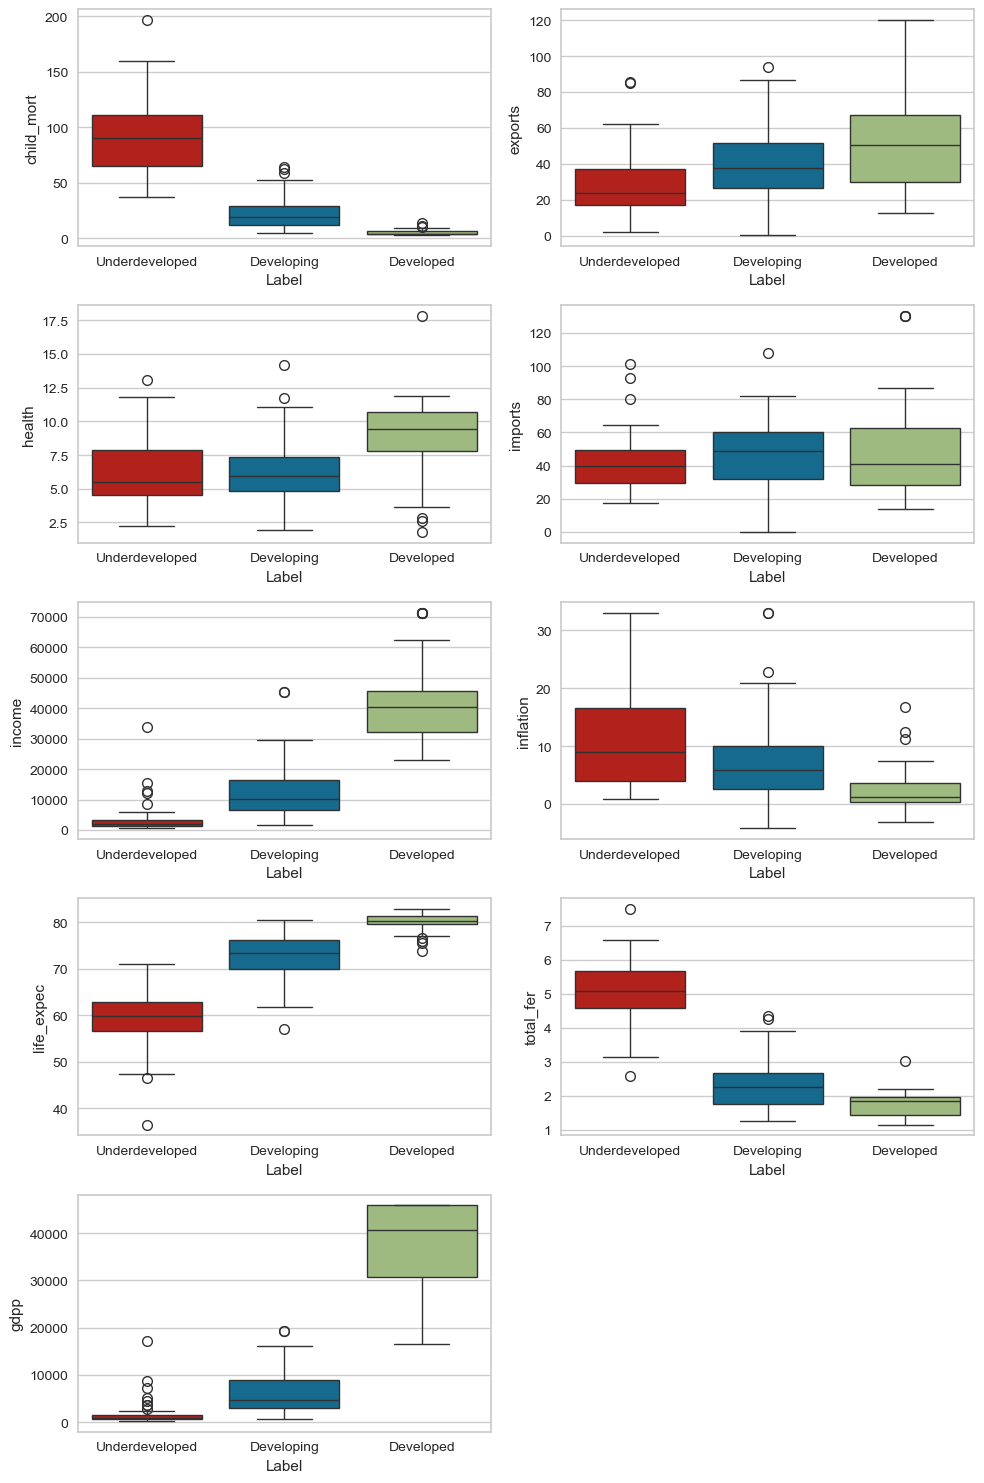

In [184]:
#visualize the parameters in each cluster
t = 1
plt.figure(figsize=(10,15))
for i in data:
    if i != 'Label':
        plt.subplot(5,2,t)
        sns.boxplot(data=data,y=i,x='Label',palette=['r','b','g'])
        t+=1
plt.tight_layout()
plt.show()
        

# world map

In [187]:
import plotly.express as px

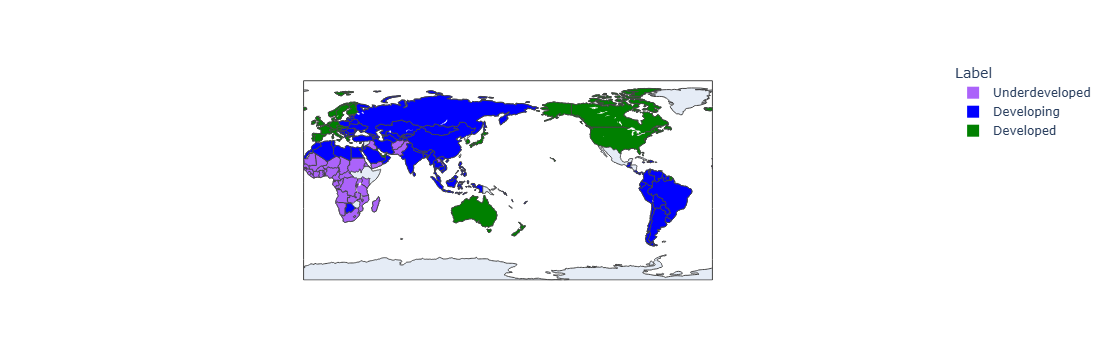

In [201]:
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='Label',
            color_discrete_map = {'Developed':'green','Developing':'blue','underdeveloped':'red'})